In [1]:
import pandas as pd
import numpy as np
import shap
import joblib
import matplotlib.pyplot as plt



c:\Users\SAKSHI  A S\pose-env\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
# Load clean dataset
df = pd.read_csv(
    "../data/ml_ready_dataset_clean.csv",
    parse_dates=["from_date"]
)

df = df.sort_values("from_date").reset_index(drop=True)

TARGET = "PM2.5"
DROP_COLS = ["from_date", "station_id"]

X = df.drop(columns=DROP_COLS + [TARGET])
y = df[TARGET]

# Same time-aware split
split_idx = int(0.8 * len(df))
X_train, X_test = X.iloc[:split_idx], X.iloc[split_idx:]
y_train, y_test = y.iloc[:split_idx], y.iloc[split_idx:]

# Load trained XGBoost model
xgb_model = joblib.load("../models/pm25_xgb_model.pkl")


In [10]:
xgb_explainer = shap.Explainer(
    xgb_model.predict,   # ✅ callable
    X_train,             # background data
    feature_names=X.columns
)


In [11]:
X_sample = X_test.sample(1000, random_state=42)

shap_values_xgb = xgb_explainer(X_sample)


PermutationExplainer explainer: 1001it [02:02,  7.89it/s]                          


C:\Users\SAKSHI  A S\AppData\Local\Temp\ipykernel_22344\202406915.py:1: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(


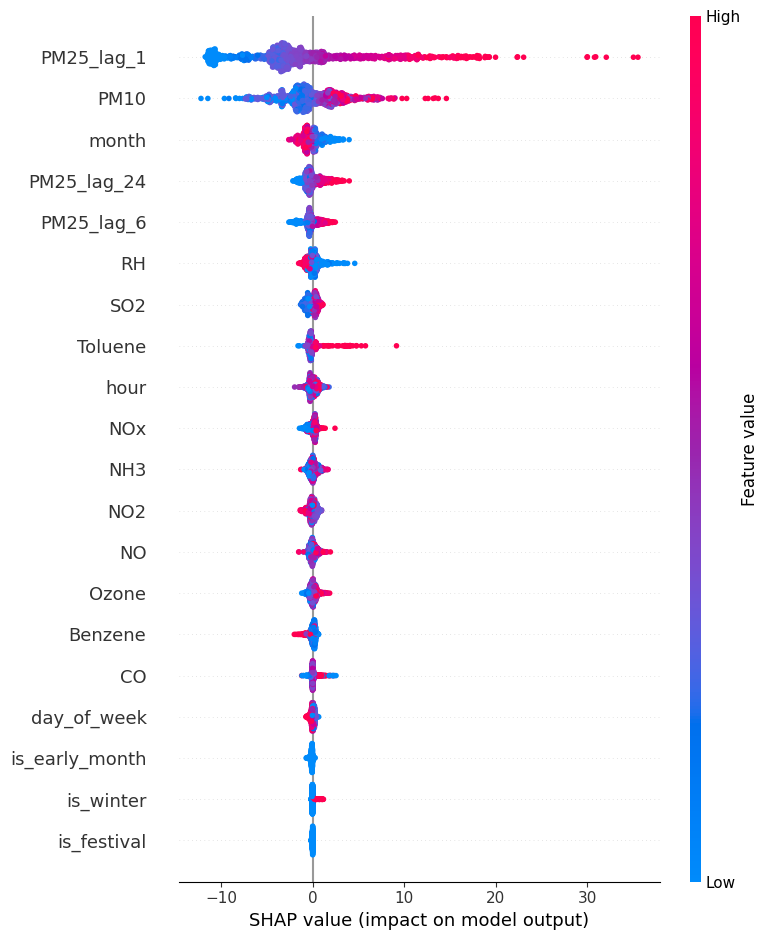

In [12]:
shap.summary_plot(
    shap_values_xgb.values,
    X_sample
)


C:\Users\SAKSHI  A S\AppData\Local\Temp\ipykernel_22344\619463293.py:1: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(


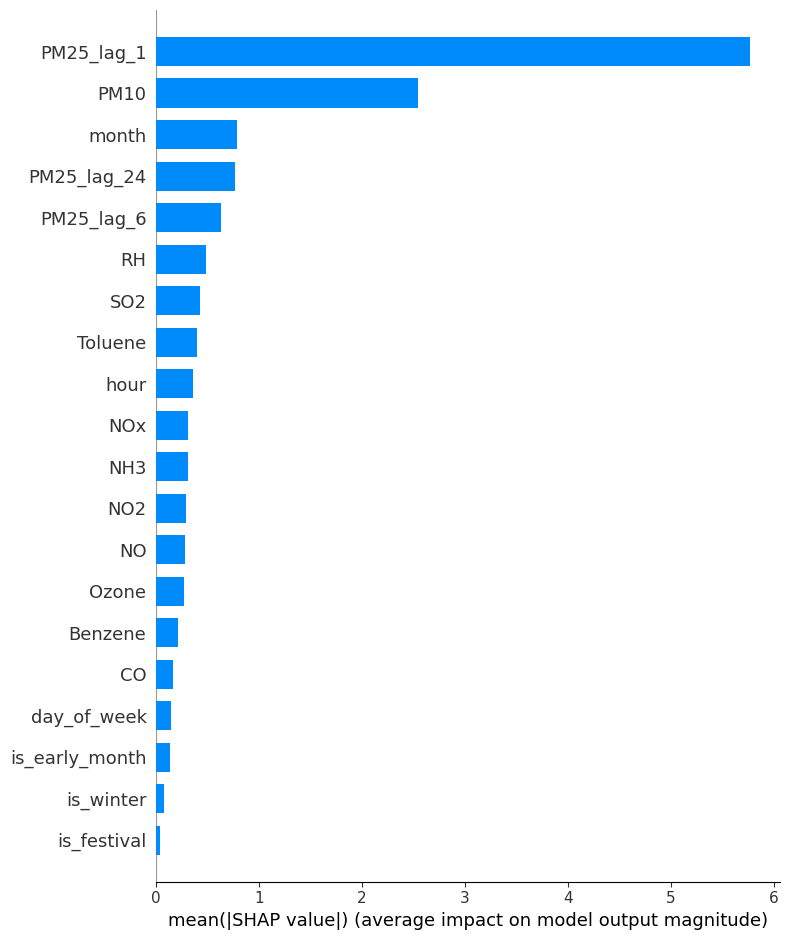

In [13]:
shap.summary_plot(
    shap_values_xgb.values,
    X_sample,
    plot_type="bar"
)


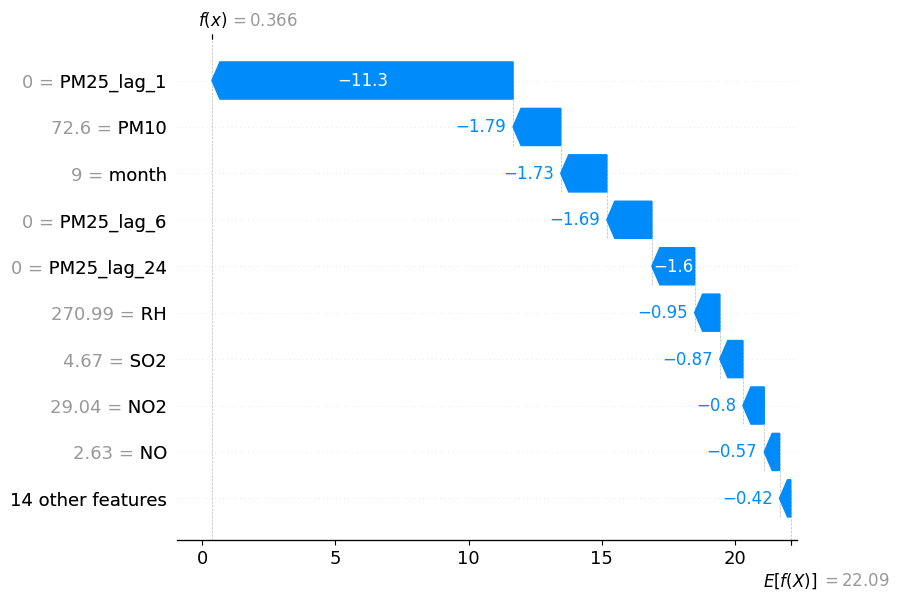

In [14]:
idx = 5
x_instance = X_test.iloc[[idx]]

shap_single = xgb_explainer(x_instance)

shap.waterfall_plot(shap_single[0])
